In [37]:
import torch
from torch.autograd.functional import jacobian
import matplotlib.pyplot as plt

In [41]:
# These are two test functions that we can use 
def f1(x1, x2, x3):
    return x1*x2 + x3

def f2(x1):
    return x1**2

In [115]:
# this is an example of using a multi variable tensor with a single variable function
A = (torch.rand(1), torch.rand(1), torch.rand(1))
jacobian(f1, A)

(tensor([[0.7988]]), tensor([[0.0716]]), tensor([[1.]]))

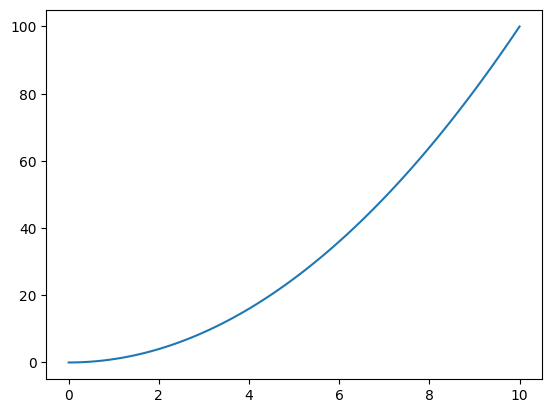

In [44]:
# Plot of of x^2
T = torch.linspace(0,10,100)
plt.plot(T,f2(T))
deriv = jacobian(f2, T)

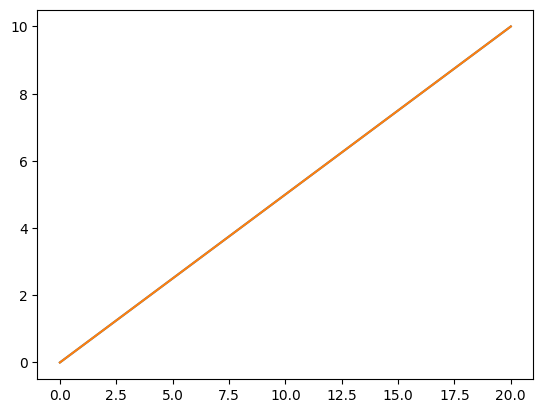

In [100]:
# comparing the derivate of x^2 with the line 2x
x = torch.ones(100,1)
Derivs = torch.mm(deriv,x)
plt.plot(Derivs,T)
plt.plot(2*T,T)

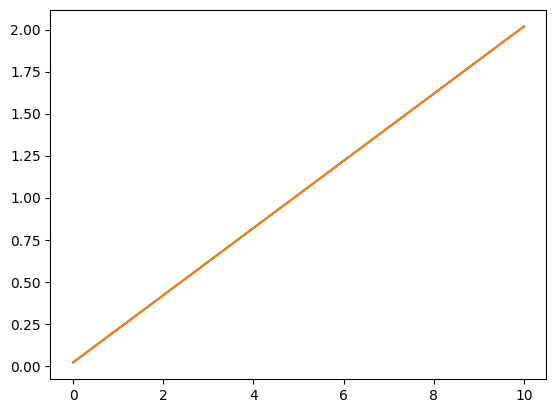

In [221]:
# comparing autograd derivative with the actual function derivative.
x = torch.tensor(0.01)
dt = 0.001
N = 1000
T = torch.linspace(0,10,N)
actual = []
approx = []
for i in range(N):
    dx_actual = 2*x
    dx_approx = jacobian(f2, x)
    x=x+dt
    
    actual.append(dx_actual)
    approx.append(dx_approx)

plt.plot(T,actual)
plt.plot(T,approx)

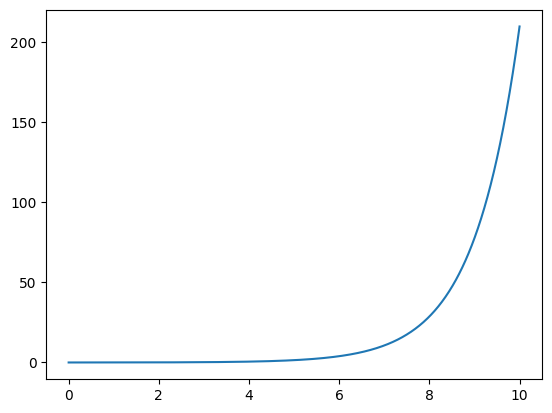

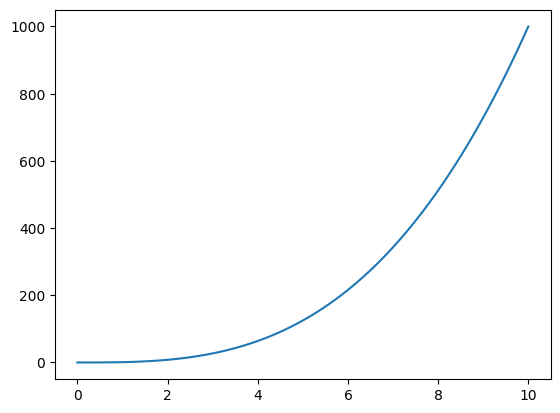

In [248]:
# This is the graph of the derivative of the function x^3
def f3(x):
    return x**3

T = torch.linspace(0,10,100)
plt.plot(T,f3(T))
deriv = jacobian(f3, T)

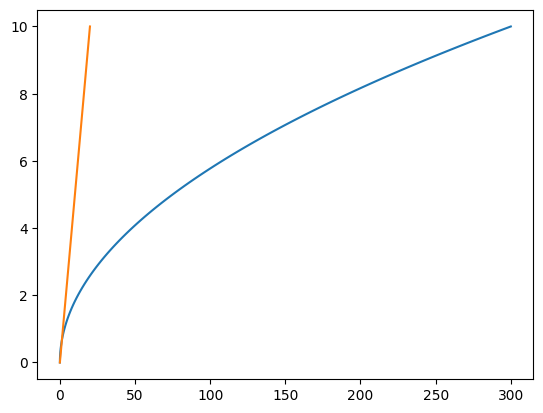

In [114]:
# This compares the autograd derivative with the actual derivative
x = torch.ones(100,1)
Derivs = torch.mm(deriv,x)
plt.plot(Derivs,T)
plt.plot(2*T,T)

In [379]:
# derivative function dx = x
def dxx(x):
    return x

# integral function e^x
def fx(x):
    return torch.exp(x)

In [423]:
end = 4
dt = 1
N = int(end/dt)

x_explicit=torch.tensor(1.0, requires_grad=True)
x_approx=torch.tensor(1.0, requires_grad=True)

explicit = [x_explicit]
approx = [x_approx]

for i in range(N-1):
    x_explicit = x_explicit+dt*dxx(x_explicit)
    
    dx_approx = fx(x_approx)
    dx_approx.backward()
    approx.append(x_approx.grad)

    explicit.append(x_explicit)
    approx.append(x_approx)
    
print(approx)

[tensor(1., requires_grad=True), tensor(8.1548), tensor(1., requires_grad=True), tensor(8.1548), tensor(1., requires_grad=True), tensor(8.1548), tensor(1., requires_grad=True)]


In [421]:
x = torch.tensor(1.0, requires_grad=True)
y = fx(x)
y.backward()
x.grad

tensor(2.7183)